# Setup
This notebook configures the environment used throughout the rest of this repository.

## 1. Create new Python environment

We use the [mamba](https://mamba.readthedocs.io/en/latest/) package manager as a faster alternative to conda.

In [1]:
!mamba create -n icenet "python=3.11" -c conda-forge
!mamba activate icenet
!mamba config append channels conda-forge

/bin/bash: mamba: command not found
/bin/bash: mamba: command not found
/bin/bash: mamba: command not found


## 2. Install PyTorch

We follow the system-specific, hardware-specific instructions on the PyTorch [website](https://pytorch.org/).

In [2]:
!mamba install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

/bin/bash: mamba: command not found


## 3. Install IceNet

Note that IceNet is a pip-installable package but is not on conda-forge. Hence, we install it via pip inside our virtual environment.

In [3]:
!python -m pip install icenet

## 4. Install other dependencies

In [4]:
!mamba install diffusers
!mamba install transformers
!mamba install hvplot
!mamba install jupyter_bokeh
!python -m pip install lexcube

/bin/bash: mamba: command not found
/bin/bash: mamba: command not found
/bin/bash: mamba: command not found
/bin/bash: mamba: command not found
ERROR: Ignored the following versions that require a different python version: 0.4.10 Requires-Python >=3.9; 0.4.13 Requires-Python >=3.9; 0.4.8 Requires-Python >=3.9; 0.4.9 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement lexcube (from versions: none)
ERROR: No matching distribution found for lexcube


## 5. Link to data

If working on a system where IceNet data already exists, follow a similar step to the one below. If working on a system without IceNet data, follow the instructions in the [IceNet Notebooks](https://github.com/icenet-ai/icenet-notebooks/) repository.

In [5]:
!ln -s /data/hpcdata/users/jambyr/icenet/data data

ln: failed to create symbolic link ‘data/data’: Permission denied


We can now preview data as below.

/users/anddon76/micromamba/envs/icenet-3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


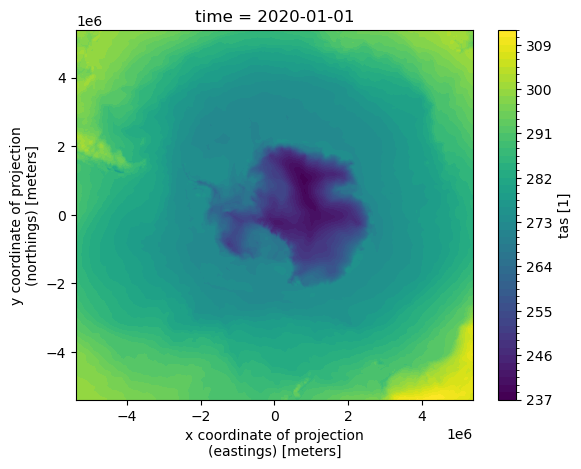

In [2]:
import hvplot.xarray
import xarray as xr
xr.plot.contourf(xr.open_dataset("data/era5/south/tas/2020.nc").isel(time=0).tas, levels=50)

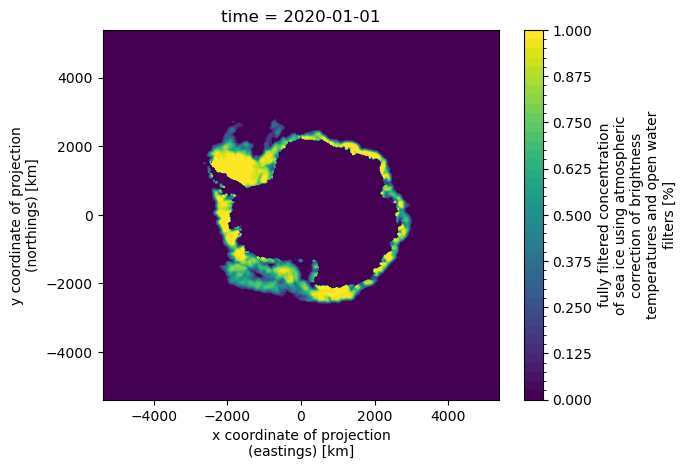

In [2]:
xr.plot.contourf(xr.open_dataset("data/osisaf/south/siconca/2020.nc").isel(time=0).ice_conc, levels=50)

In [3]:
# set constant colorbar limits
xr.open_dataset("data/osisaf/south/siconca/2020.nc").ice_conc.hvplot(
    groupby="time",  # adds a widget for time
    widget_type="scrubber",
    widget_location="bottom",
    aspect="equal",
    colormap="viridis"
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'dc42de7d-982d-4bc1-81e7-cf2d4443d2da': {'version…

In [4]:
import lexcube
lexcube.Cube3DWidget(xr.open_dataset("data/osisaf/south/siconca/2020.nc").ice_conc)

Xarray input object does not have chunks. You can re-open with 'chunks={}' to enable dask for caching and progress reporting functionality - but may be overall slower for small data sets.


Cube3DWidget(api_metadata={'/api': {'status': 'ok', 'api_version': 5}, '/api/datasets': [{'id': 'default', 'sh…